In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix , classification_report

# **Exploratory Data Analysis of Non-Alcoholic Fatty Liver Disease:**

In [ ]:
# Load the nafld1 file
nafld1_data = pd.read_csv('fatty liver.csv')

# Data exploration
print("Statistiques descriptives :")
print(nafld1_data.describe())

Statistiques descriptives :
         Unnamed: 0            id           age          male        weight  \
count  17549.000000  17549.000000  17549.000000  17549.000000  12763.000000   
mean    8780.106046   8784.215967     52.659639      0.467320     86.353350   
std     5070.539328   5070.970712     14.722515      0.498945     22.239458   
min        1.000000      1.000000     18.000000      0.000000     33.400000   
25%     4389.000000   4393.000000     42.000000      0.000000     70.000000   
50%     8778.000000   8786.000000     53.000000      0.000000     83.900000   
75%    13171.000000  13175.000000     63.000000      1.000000     99.200000   
max    17566.000000  17566.000000     98.000000      1.000000    181.700000   

             height           bmi       case.id        futime        status  
count  14381.000000  12588.000000  17518.000000  17549.000000  17549.000000  
mean     169.434949     30.073865   8840.924478   2410.600547      0.077725  
std       10.141421      7

**Distribution of Age in Non-Alcoholic Fatty Liver Disease Data :**

In [4]:
nafld1_data.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


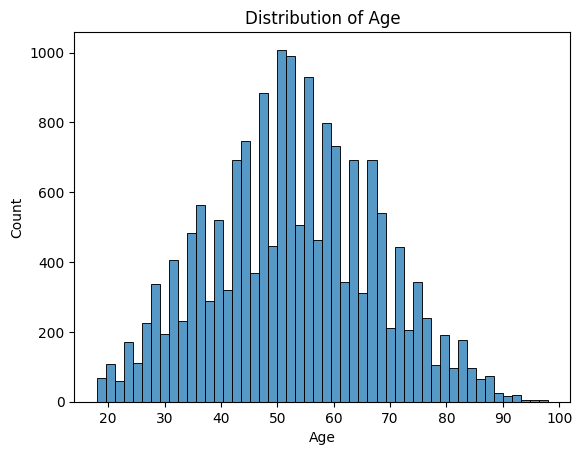

In [5]:
sns.histplot(nafld1_data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

**Comparison of BMI by Gender in Non-Alcoholic Fatty Liver Disease Data :**

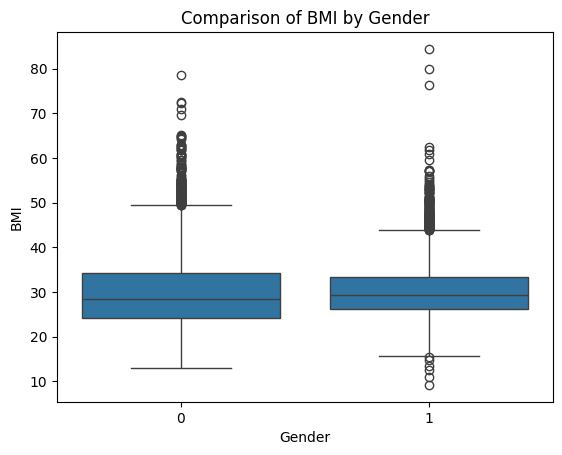

In [6]:
sns.boxplot(x='male', y='bmi', data=nafld1_data)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Comparison of BMI by Gender')
plt.show()

**Comparison of features between NAFLD and control groups :**

In [7]:
nafld_group = nafld1_data[nafld1_data['case.id'] == 1]
control_group = nafld1_data[nafld1_data['case.id'] == 0]

t_stat, p_value = ttest_ind(nafld_group['weight'], control_group['weight'])
print("T-Test - Weight: t-statistic = {:.2f}, p-value = {:.4f}".format(t_stat, p_value))

chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(nafld1_data['male'], nafld1_data['case.id']))
print("Chi-Square Test - Gender and NAFLD: chi2-statistic = {:.2f}, p-value = {:.4f}".format(chi2_stat, p_value))

T-Test - Weight: t-statistic = nan, p-value = nan
Chi-Square Test - Gender and NAFLD: chi2-statistic = 17518.00, p-value = 0.0000


c:\Users\HP\Work\Project\cure_with_AI\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


**Survival Analysis :** Kaplan-Meier Survival Curve

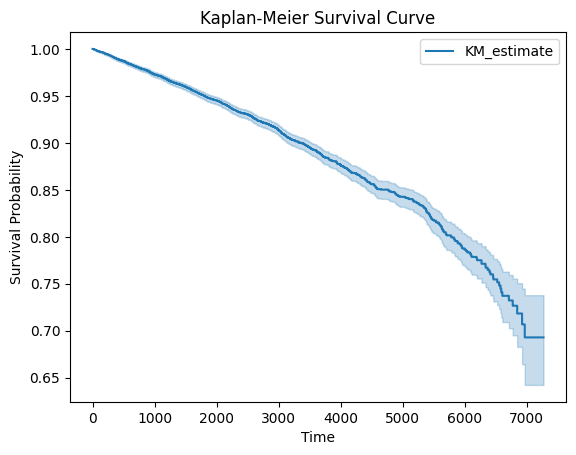

In [8]:
# Modélisation prédictive - Classification
# Utilisez les variables de votre choix pour créer les ensembles d'entraînement et de test,
# puis entraînez et évaluez votre modèle de classification.

# Analyse de survie
kmf = KaplanMeierFitter()
kmf.fit(nafld1_data['futime'], nafld1_data['status'])
kmf.plot_survival_function()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve')
plt.show()

**Cox Proportional Hazard Model :** Survival Analysis

In [9]:
# Remove rows containing missing values
nafld1_data = nafld1_data.dropna()

# Create an instance of the Cox proportional hazard regression model
cph = CoxPHFitter()

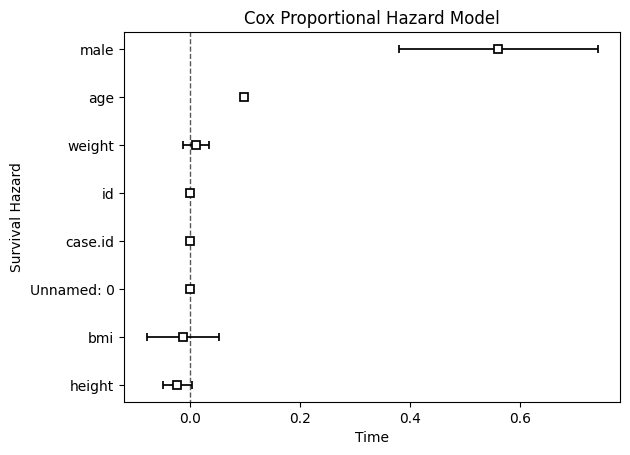

In [10]:
cph.fit(nafld1_data, duration_col='futime', event_col='status')
cph.plot()
plt.xlabel('Time')
plt.ylabel('Survival Hazard')
plt.title('Cox Proportional Hazard Model')
plt.show()

**Correlation Analysis :**

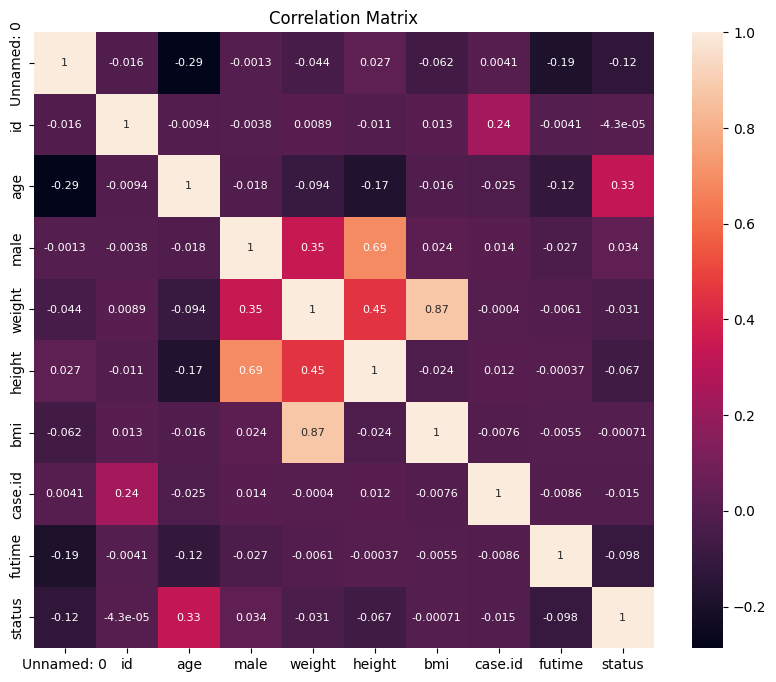

In [11]:
correlation_matrix = nafld1_data.corr()
plt.figure(figsize=(10, 8))  # Ajuster la taille de la heatmap
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8})  # Ajuster la taille des annotations
plt.title('Correlation Matrix')
plt.show()

# **Improved Random Forest Classifier for Non-Alcoholic Fatty Liver Disease Prediction:**

In [12]:
data = nafld1_data

**Splitting the Features (Independent Variables) and the Target Variable (Status)** :

In [13]:
X = data.drop(["id", "status", "bmi","Unnamed: 0", "futime","case.id"], axis=1)
y = data["status"]

In [14]:
X.head()

,age,male,weight,height
0,57,0,60.0,163.0
1,67,0,70.4,168.0
2,53,1,105.8,186.0
3,56,1,109.3,170.0
5,39,0,63.9,155.0


**Splitting the data into training and test sets :**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10049 entries, 9424 to 15349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     10049 non-null  int64  
 1   male    10049 non-null  int64  
 2   weight  10049 non-null  float64
 3   height  10049 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 392.5 KB


**Creating a pipeline for data preprocessing :**

In [35]:
pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, max_depth=5)
)

**Train the model on the training data :**

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

**Making predictions on the test data :**

In [37]:
predictions = pipeline.predict(X_test)

**Calculating the Model Accuracy :**

In [38]:
accuracy = accuracy_score(y_test, predictions)
print("Exactitude du modèle : {:.2f}%".format(accuracy * 100))

Exactitude du modèle : 92.00%


# Confusion Matrix Visualization :
This code computes the confusion matrix based on the predicted and actual values of a classification model. It then plots the confusion matrix as a heatmap using matplotlib.pyplot and seaborn. The matrix provides insights into the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives. The color-coded heatmap highlights the distribution of predictions, with darker shades indicating higher values. The title, x-axis, and y-axis labels provide additional context for interpreting the confusion matrix.

In [39]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

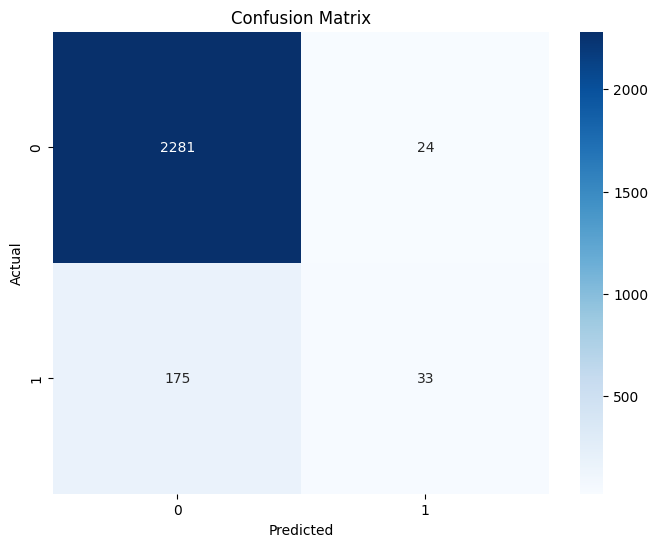

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Receiver Operating Characteristic (ROC) Curve Visualization :
This code generates and plots an ROC curve to evaluate the performance of a binary classification model. It uses predicted probabilities to compute the false positive rate, true positive rate, and thresholds. The resulting curve showcases the trade-off between true positive and false positive rates, with the AUC score representing overall performance.

In [23]:
# Get the predicted probabilities for each class
predicted_probabilities = pipeline.predict_proba(X_test)

In [24]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities[:, 1])

In [25]:
# Compute the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

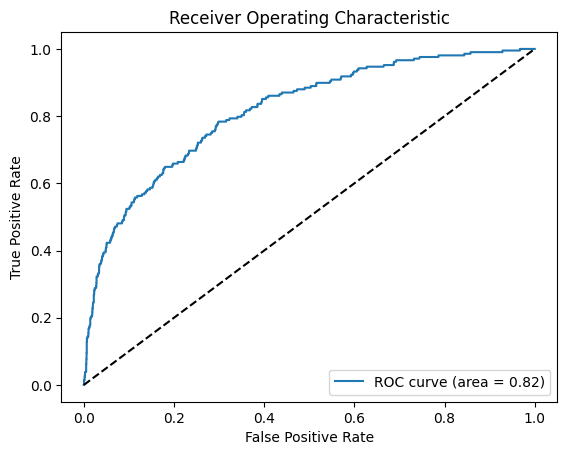

In [26]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [27]:
from sklearn.linear_model import  LogisticRegression

In [28]:
lr_pipeline = make_pipeline(SimpleImputer(strategy="mean"),
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# 4. Fit the pipeline
lr_pipeline.fit(X_train, y_train)

# 5. Predict
y_pred_lr = lr_pipeline.predict(X_test)

In [29]:
print("----- Logistic Regression -----")

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

# Classification Report
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", report_lr)

----- Logistic Regression -----
Accuracy: 0.9220
Confusion Matrix:
 [[2292   13]
 [ 183   25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2305
           1       0.66      0.12      0.20       208

    accuracy                           0.92      2513
   macro avg       0.79      0.56      0.58      2513
weighted avg       0.90      0.92      0.90      2513



In [30]:
from sklearn.svm import SVC

In [31]:
svc_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    SVC(probability=True, random_state=42))


# 3. Fit the pipeline
svc_pipeline.fit(X_train, y_train)

# 4. Predict
y_pred_svc = svc_pipeline.predict(X_test)

In [32]:
print("----- Support Vector Machine -----")

# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc:.4f}")

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:\n", cm_svc)

# Classification Report
report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report:\n", report_svc)


----- Support Vector Machine -----
Accuracy: 0.9208
Confusion Matrix:
 [[2300    5]
 [ 194   14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      2305
           1       0.74      0.07      0.12       208

    accuracy                           0.92      2513
   macro avg       0.83      0.53      0.54      2513
weighted avg       0.91      0.92      0.89      2513



In [40]:
import pickle as pkl

In [41]:
pkl.dump(pipeline , open('fatty_liver.pkl', 'wb'))